In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [44]:
file_path = "Housing.csv"
df = pd.read_csv(file_path)

In [45]:
df.shape

(546, 13)

In [46]:
df.head()

,rownames,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,1,42000,5850,3,1,2,yes,no,yes,no,no,1,no
1,2,38500,4000,2,1,1,yes,no,no,no,no,0,no
2,3,49500,3060,3,1,1,yes,no,no,no,no,0,no
3,4,60500,6650,3,1,2,yes,yes,no,no,no,0,no
4,5,61000,6360,2,1,1,yes,no,no,no,no,0,no


In [47]:
df.describe()

,rownames,price,lotsize,bedrooms,bathrms,stories,garagepl
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,273.500000,68121.597070,5150.265568,2.965201,1.285714,1.807692,0.692308
std,157.760895,26702.670926,2168.158725,0.737388,0.502158,0.868203,0.861307
min,1.000000,25000.000000,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,137.250000,49125.000000,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,273.500000,62000.000000,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,409.750000,82000.000000,6360.000000,3.000000,2.000000,2.000000,1.000000
max,546.000000,190000.000000,16200.000000,6.000000,4.000000,4.000000,3.000000


In [48]:
df.dtypes

rownames     int64
price        int64
lotsize      int64
bedrooms     int64
bathrms      int64
stories      int64
driveway    object
recroom     object
fullbase    object
gashw       object
airco       object
garagepl     int64
prefarea    object
dtype: object

In [49]:
df.isna().sum()

rownames    0
price       0
lotsize     0
bedrooms    0
bathrms     0
stories     0
driveway    0
recroom     0
fullbase    0
gashw       0
airco       0
garagepl    0
prefarea    0
dtype: int64

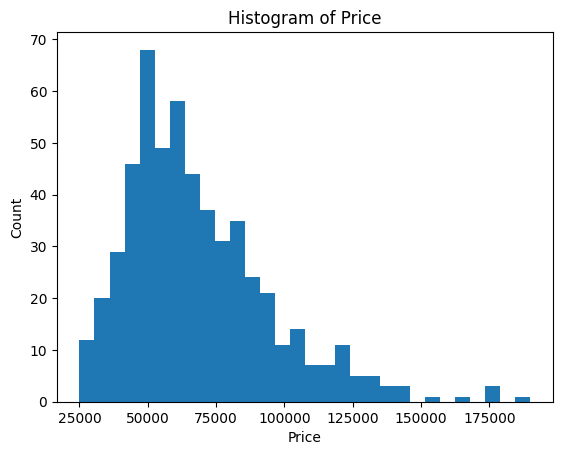

In [50]:
plt.figure()
plt.hist(df['price'], bins=30)
plt.title('Histogram of Price')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

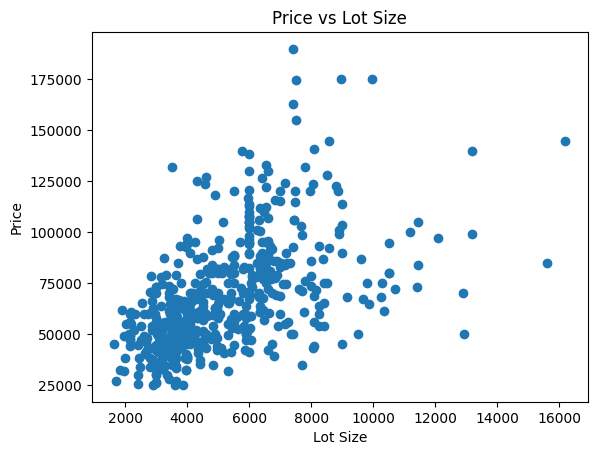

In [51]:
plt.figure()
plt.scatter(df['lotsize'], df['price'])
plt.title('Price vs Lot Size')
plt.xlabel('Lot Size')
plt.ylabel('Price')
plt.show()

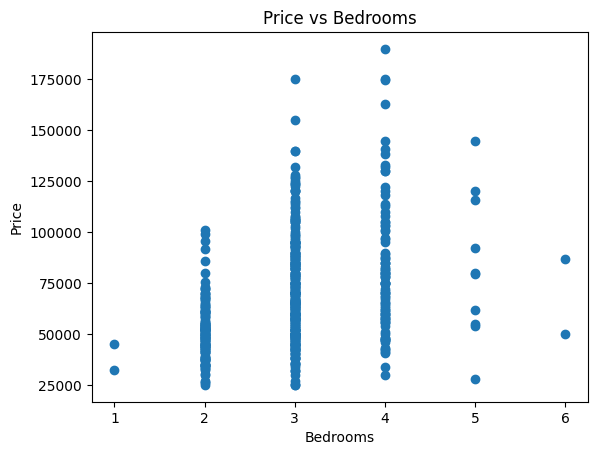

In [52]:
plt.figure()
plt.scatter(df['bedrooms'], df['price'])
plt.title('Price vs Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()

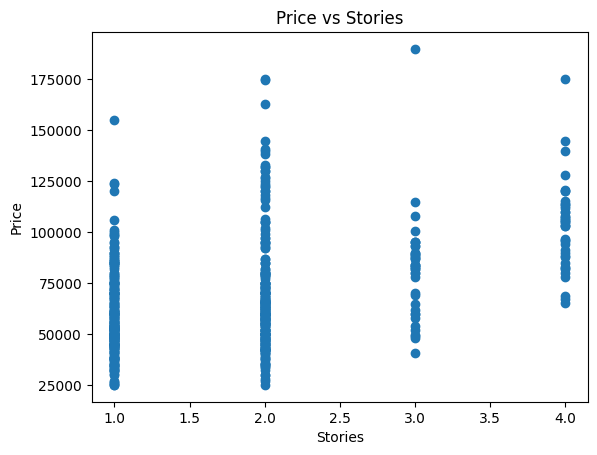

In [53]:
plt.figure()
plt.scatter(df['stories'], df['price'])
plt.title('Price vs Stories')
plt.xlabel('Stories')
plt.ylabel('Price')
plt.show()

In [54]:
target_column = 'price'
potential_columns = ['driveway', 'recroom', 'fullbase', 'gashw', 'airco', 'prefarea']
numeric_columns = ['lotsize', 'bedrooms', 'stories', 'bathrms', 'garagepl']

categorical_columns = [c for c in potential_columns if c in df.columns]
all_columns = numeric_columns + categorical_columns + [target_column]

df = df[all_columns].copy()
df.head()


,lotsize,bedrooms,stories,bathrms,garagepl,driveway,recroom,fullbase,gashw,airco,prefarea,price
0,5850,3,2,1,1,yes,no,yes,no,no,no,42000
1,4000,2,1,1,0,yes,no,no,no,no,no,38500
2,3060,3,1,1,0,yes,no,no,no,no,no,49500
3,6650,3,2,1,0,yes,yes,no,no,no,no,60500
4,6360,2,1,1,0,yes,no,no,no,no,no,61000


In [55]:
df_factorized = df.copy()
factorize_maps = {}
for column in categorical_columns:
    codes, unique = pd.factorize(df[column])
    df_factorized[column] = codes
    factorize_maps[column] = list(unique)
display(df_factorized.head())
factorize_maps

,lotsize,bedrooms,stories,bathrms,garagepl,driveway,recroom,fullbase,gashw,airco,prefarea,price
0,5850,3,2,1,1,0,0,0,0,0,0,42000
1,4000,2,1,1,0,0,0,1,0,0,0,38500
2,3060,3,1,1,0,0,0,1,0,0,0,49500
3,6650,3,2,1,0,0,1,1,0,0,0,60500
4,6360,2,1,1,0,0,0,1,0,0,0,61000


{'driveway': ['yes', 'no'],
 'recroom': ['no', 'yes'],
 'fullbase': ['yes', 'no'],
 'gashw': ['no', 'yes'],
 'airco': ['no', 'yes'],
 'prefarea': ['no', 'yes']}

In [56]:
df_onehot = pd.get_dummies(df, columns = categorical_columns, drop_first = True)
display(df_onehot.head())

,lotsize,bedrooms,stories,bathrms,garagepl,price,driveway_yes,recroom_yes,fullbase_yes,gashw_yes,airco_yes,prefarea_yes
0,5850,3,2,1,1,42000,True,False,True,False,False,False
1,4000,2,1,1,0,38500,True,False,False,False,False,False
2,3060,3,1,1,0,49500,True,False,False,False,False,False
3,6650,3,2,1,0,60500,True,True,False,False,False,False
4,6360,2,1,1,0,61000,True,False,False,False,False,False


In [57]:
# MinMaxScaler
# StandardScaler

num_demo = df[numeric_columns].copy()
mms = MinMaxScaler()
stds = StandardScaler()
num_mms = pd.DataFrame(mms.fit_transform(num_demo), columns=numeric_columns)
num_stds = pd.DataFrame(stds.fit_transform(num_demo), columns=numeric_columns)
display(num_mms.head())
display(num_stds.head())

,lotsize,bedrooms,stories,bathrms,garagepl
0,0.288660,0.4,0.333333,0.0,0.333333
1,0.161512,0.2,0.000000,0.0,0.000000
2,0.096907,0.4,0.000000,0.0,0.000000
3,0.343643,0.4,0.333333,0.0,0.000000
4,0.323711,0.2,0.000000,0.0,0.000000


,lotsize,bedrooms,stories,bathrms,garagepl
0,0.323028,0.047235,0.221704,-0.569495,0.357567
1,-0.531013,-1.310147,-0.931157,-0.569495,-0.804525
2,-0.964958,0.047235,-0.931157,-0.569495,-0.804525
3,0.692343,0.047235,0.221704,-0.569495,-0.804525
4,0.558466,-1.310147,-0.931157,-0.569495,-0.804525


In [58]:
# SimpleImputer
df_impute_demo = df.copy()
df_impute_demo.loc[df_impute_demo.sample(5, random_state=42).index, 'lotsize'] = np.nan
df_impute_demo.loc[df_impute_demo.sample(5, random_state=0).index, 'driveway'] = np.nan
num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')
df_impute_demo[numeric_columns] = num_imputer.fit_transform(df_impute_demo[numeric_columns])
df_impute_demo[categorical_columns] = cat_imputer.fit_transform(df_impute_demo[categorical_columns])

df_impute_demo.isna().sum()



lotsize     0
bedrooms    0
stories     0
bathrms     0
garagepl    0
driveway    0
recroom     0
fullbase    0
gashw       0
airco       0
prefarea    0
price       0
dtype: int64

In [59]:
df_fe = df.copy()
df_fe['room_total'] = df['bedrooms'] + df['bathrms']
df_fe['lotsize_per_room'] = df['lotsize'] / np.where(df_fe['room_total'] > 0, df_fe['room_total'], 1)
df_fe[['lotsize', 'bedrooms', 'bathrms', 'room_total', 'lotsize_per_room']].head()

,lotsize,bedrooms,bathrms,room_total,lotsize_per_room
0,5850,3,1,4,1462.500000
1,4000,2,1,3,1333.333333
2,3060,3,1,4,765.000000
3,6650,3,1,4,1662.500000
4,6360,2,1,3,2120.000000


In [60]:
X = df_fe.drop(columns=target_column)
y = df_fe[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

num_features = numeric_columns + ['room_total', 'lotsize_per_room']
cat_features = categorical_columns
numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')), ('one_hot', OneHotEncoder(handle_unknown='ignore'))])
preprocess = ColumnTransformer(
    transformers=
    [("num",numeric_transformer, num_features),
     ('cat',categorical_transformer, cat_features)
     ]
)
linreg_model = Pipeline(steps=[('preprocessor', preprocess),("model", LinearRegression())])

linreg_model.fit(X_train, y_train)
y_pred = linreg_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mae)
r2 = r2_score(y_test, y_pred)

(mae, rmse, r2)

(11228.976889736132, np.float64(105.96686694309751), 0.6213292080382551)

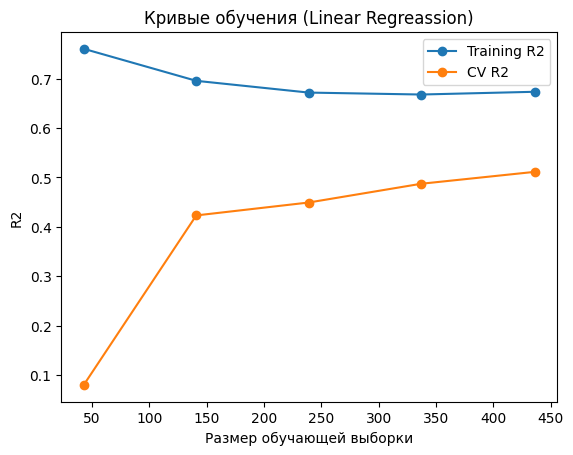

In [62]:
train_sizes, train_scores, test_scores = learning_curve(linreg_model, X, y, cv=5, scoring='r2',
                                                        train_sizes=np.linspace(.1, 1.0, 5), n_jobs=None,
                                                        shuffle=True, random_state=42)
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.figure()
plt.plot(train_sizes, train_mean, marker='o', label='Training R2')
plt.plot(train_sizes, test_mean, marker ='o', label='CV R2')
plt.title('Кривые обучения (Linear Regreassion)')
plt.xlabel("Размер обучающей выборки")
plt.ylabel("R2")
plt.legend()
plt.show()

In [65]:
new_data = pd.DataFrame([{
    'lotsize': 6800,
    'bedrooms': 5,
    'bathrms': 1,
    'stories': 3,
    'garagepl': 0,
    'driveway': 'yes',
    'prefarea': 'yes',
    'recroom': 'yes',
    'fullbase': 'yes',
    'gashw': 'yes',
    'airco': 'yes',
}])

new_data['room_total'] = new_data['bedrooms'] + new_data['bathrms']
new_data['lotsize_per_room'] = new_data['lotsize'] / new_data['room_total']

predictions = linreg_model.predict(new_data)
print(predictions[0])

115367.02009910315
